# Turtle Shelter

Web Scraping practise using BeautifulSoup. 

In [229]:
#Importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [230]:
prefix = "https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/"
webpage_response = requests.get('https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/shellter.html')

webpage = webpage_response.content
soup = BeautifulSoup(webpage, "html.parser")

turtle_links = soup.find_all("a")
links = []
#go through all of the a tags and get the links associated with them"
for a in turtle_links:
    links.append(prefix+a["href"])
    
#Define turtle_data:
turtle_data = {}

#follow each link:
for link in links:
  webpage = requests.get(link)
  turtle = BeautifulSoup(webpage.content, "html.parser")
  turtle_name = turtle.select(".name")[0].get_text()
  
  stats = turtle.find("ul")
  stats_text = stats.get_text("|")
  turtle_data[turtle_name] = stats_text.split("|")

In [231]:
turtle_df = pd.DataFrame.from_dict(turtle_data, orient='index')
print(turtle_df)

           0                   1   2                3   4            5   6   \
Aesop      \n    AGE: 7 Years Old  \n    WEIGHT: 6 lbs  \n  SEX: Female  \n   
Caesar     \n    AGE: 2 Years Old  \n    WEIGHT: 4 lbs  \n    SEX: Male  \n   
Sulla      \n     AGE: 1 Year Old  \n     WEIGHT: 1 lb  \n    SEX: Male  \n   
Spyro      \n    AGE: 6 Years Old  \n    WEIGHT: 3 lbs  \n  SEX: Female  \n   
Zelda      \n    AGE: 3 Years Old  \n    WEIGHT: 2 lbs  \n  SEX: Female  \n   
Bandicoot  \n    AGE: 2 Years Old  \n    WEIGHT: 2 lbs  \n    SEX: Male  \n   
Hal        \n     AGE: 1 Year Old  \n  WEIGHT: 1.5 lbs  \n  SEX: Female  \n   
Mock       \n   AGE: 10 Years Old  \n   WEIGHT: 10 lbs  \n    SEX: Male  \n   
Sparrow    \n  AGE: 1.5 Years Old  \n  WEIGHT: 4.5 lbs  \n  SEX: Female  \n   

                                               7   8   \
Aesop      BREED: African Aquatic Sideneck Turtle  \n   
Caesar                      BREED: Greek Tortoise  \n   
Sulla      BREED: African Aquatic Side

Now we have all of the turtles’ information in one DataFrame. But obviously, in just scraping this data and plopping it into Pandas, we’re left with a pretty messy DataFrame.

There are newlines in the data, the column names are hidden in strings in the rows, and none of the numerical data is stored as a numerical type.
It would be pretty hard to create any sort of analysis on this raw data. What if we wanted to make a histogram of the ages of turtles in the Shellter?

This is where Data Cleaning and Regex comes in! Try to practice what you know about data cleaning to get turtles_df into a usable state. It’s up to you to decide what “usable” means to you.

In [232]:
#drop columns we dont need
turtle_df = turtle_df.drop([0, 2, 4, 6, 8, 10], axis=1)
turtle_df

,1,3,5,7,9
Aesop,AGE: 7 Years Old,WEIGHT: 6 lbs,SEX: Female,BREED: African Aquatic Sideneck Turtle,SOURCE: found in Lake Erie
Caesar,AGE: 2 Years Old,WEIGHT: 4 lbs,SEX: Male,BREED: Greek Tortoise,SOURCE: hatched in house
Sulla,AGE: 1 Year Old,WEIGHT: 1 lb,SEX: Male,BREED: African Aquatic Sideneck Turtle,SOURCE: found in Lake Erie
Spyro,AGE: 6 Years Old,WEIGHT: 3 lbs,SEX: Female,BREED: Greek Tortoise,SOURCE: hatched in house
Zelda,AGE: 3 Years Old,WEIGHT: 2 lbs,SEX: Female,BREED: Eastern Box Turtle,SOURCE: surrendered by owner
Bandicoot,AGE: 2 Years Old,WEIGHT: 2 lbs,SEX: Male,BREED: African Aquatic Sideneck Turtle,SOURCE: hatched in house
Hal,AGE: 1 Year Old,WEIGHT: 1.5 lbs,SEX: Female,BREED: Eastern Box Turtle,SOURCE: surrendered by owner
Mock,AGE: 10 Years Old,WEIGHT: 10 lbs,SEX: Male,BREED: Greek Tortoise,SOURCE: surrendered by owner
Sparrow,AGE: 1.5 Years Old,WEIGHT: 4.5 lbs,SEX: Female,BREED: African Aquatic Sideneck Turtle,SOURCE: found in Lake Erie


In [233]:
#Reset index and rename columns
turtle_df = turtle_df.reset_index()
turtle_df.columns=["Name", "Age", "Weight", "Sex", "Breed", "Source"]
turtle_df

,Name,Age,Weight,Sex,Breed,Source
0,Aesop,AGE: 7 Years Old,WEIGHT: 6 lbs,SEX: Female,BREED: African Aquatic Sideneck Turtle,SOURCE: found in Lake Erie
1,Caesar,AGE: 2 Years Old,WEIGHT: 4 lbs,SEX: Male,BREED: Greek Tortoise,SOURCE: hatched in house
2,Sulla,AGE: 1 Year Old,WEIGHT: 1 lb,SEX: Male,BREED: African Aquatic Sideneck Turtle,SOURCE: found in Lake Erie
3,Spyro,AGE: 6 Years Old,WEIGHT: 3 lbs,SEX: Female,BREED: Greek Tortoise,SOURCE: hatched in house
4,Zelda,AGE: 3 Years Old,WEIGHT: 2 lbs,SEX: Female,BREED: Eastern Box Turtle,SOURCE: surrendered by owner
5,Bandicoot,AGE: 2 Years Old,WEIGHT: 2 lbs,SEX: Male,BREED: African Aquatic Sideneck Turtle,SOURCE: hatched in house
6,Hal,AGE: 1 Year Old,WEIGHT: 1.5 lbs,SEX: Female,BREED: Eastern Box Turtle,SOURCE: surrendered by owner
7,Mock,AGE: 10 Years Old,WEIGHT: 10 lbs,SEX: Male,BREED: Greek Tortoise,SOURCE: surrendered by owner
8,Sparrow,AGE: 1.5 Years Old,WEIGHT: 4.5 lbs,SEX: Female,BREED: African Aquatic Sideneck Turtle,SOURCE: found in Lake Erie


Using regex to extract numerical data and cleaning the other columns

In [234]:
turtle_df.Weight = turtle_df["Weight"].replace("[lbs,]","", regex=True)
turtle_df.Weight = turtle_df["Weight"].replace("[WEIGHT: ,]","", regex=True)
turtle_df.Weight = pd.to_numeric(turtle_df.Weight)
turtle_df.Age = turtle_df["Age"].replace("[Years Old,]","", regex=True)
turtle_df.Age = turtle_df["Age"].replace("[AGE: ,]","", regex=True)
turtle_df.Age = pd.to_numeric(turtle_df.Age)
turtle_df.Sex = turtle_df["Sex"].replace("[SEX: ,]","", regex=True)
turtle_df.Breed = turtle_df["Breed"].replace("[BREED:,]","", regex=True)
turtle_df.Source = turtle_df["Source"].replace("[SOURCE:,]","", regex=True)

In [235]:
turtle_df

,Name,Age,Weight,Sex,Breed,Source
0,Aesop,7.0,6.0,Female,African Aquatic Sideneck Turtle,found in Lake rie
1,Caesar,2.0,4.0,Male,Greek Tortoise,hatched in house
2,Sulla,1.0,1.0,Male,African Aquatic Sideneck Turtle,found in Lake rie
3,Spyro,6.0,3.0,Female,Greek Tortoise,hatched in house
4,Zelda,3.0,2.0,Female,astern ox Turtle,surrendered by owner
5,Bandicoot,2.0,2.0,Male,African Aquatic Sideneck Turtle,hatched in house
6,Hal,1.0,1.5,Female,astern ox Turtle,surrendered by owner
7,Mock,10.0,10.0,Male,Greek Tortoise,surrendered by owner
8,Sparrow,1.5,4.5,Female,African Aquatic Sideneck Turtle,found in Lake rie


Now we can create a histogram of Age and Weight. And then see the relation between both.

In [236]:
Ages = turtle_df["Age"]
Weights = turtle_df["Weight"]

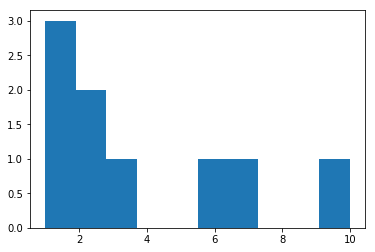

In [237]:
plt.hist(Ages)
plt.show()

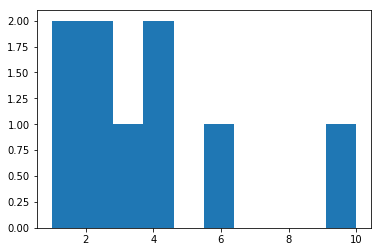

In [238]:
plt.hist(Weights)
plt.show()

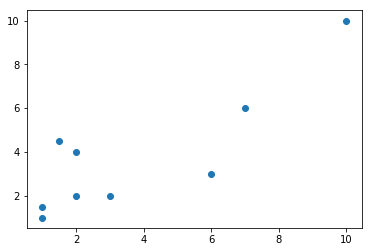

In [239]:
plt.scatter(Ages, Weights)
plt.show()

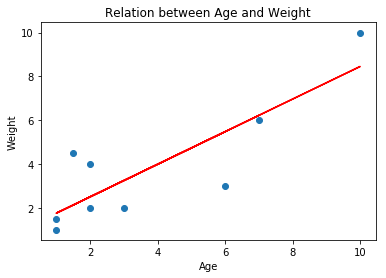

In [240]:
y = turtle_df["Weight"]
x = turtle_df["Age"]
fit = np.polyfit(x, y, deg=1)
plt.scatter(Ages, Weights)
plt.title('Relation between Age and Weight')
plt.ylabel('Weight')
plt.xlabel('Age')
plt.plot(x, fit[0] * x + fit[1], color='red')

plt.show()